# Rates

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams["figure.figsize"] = [16, 14] 

In [2]:
items = pd.DataFrame(columns=["workers", "rate", "good", "all", "latency"])

prefix = "data/aa0bdd57/"
for workers in os.listdir(os.fsencode(prefix)):
    w = os.fsdecode(workers)
    for rate in os.listdir(os.fsencode(prefix + w)):
        r = os.fsdecode(rate)
        all = np.int32(0)
        good = np.int32(0)
        for node in os.listdir(os.fsencode(prefix + w + "/" + r + "/flamestream/rate/")):
            (prefix + w + "/" + r + "/flamestream/latency/lat.data")
            
            p = 0
            with open(prefix + w + "/" + r +"/flamestream/latency/lat.data") as f:
                d = np.array(f.read().strip().split(','), dtype=np.int32)
                p = (np.percentile(d[200:], 90)) / 1e6
                     
            n = os.fsdecode(node)
            with open(os.fsencode(prefix + w + "/" + r + "/flamestream/rate/" + n)) as f:
                data = f.read().strip()
                all += np.int32(data.split("/")[0])
                good += np.int32(data.split("/")[1])
        df =  pd.DataFrame(data = {'workers' : [np.int32(w)], 'rate' : [np.int32(r)], 'good' : [good], 'all' : [all], 'latency': [p]})       
        items = pd.concat([items, df])

In [3]:
items['coef'] = items['all'] / items['good']

In [4]:
items['rate'].unique()

array([50, 110, 80, 100, 70, 60, 90, 40], dtype=object)

In [5]:
items.head()

,all,good,latency,rate,workers,coef
0,1357987,1016965,199.424870,50,4,1.33533
0,1038415,1016965,64.784084,110,4,1.02109
0,1063813,1016965,78.969061,80,4,1.04607
0,1042679,1016965,68.431243,100,4,1.02529
0,1106963,1016965,84.978558,70,4,1.0885


In [6]:
# workers = np.array([1, 2, 4, 5, 7, 8, 10])
workers = np.array([4, 5, 6, 7, 8, 9, 10])
rates = np.array([40, 50, 60, 70, 80, 90, 100, 110])

In [7]:
X, Y = np.meshgrid(rates, workers)
Z = np.zeros((len(workers), len(rates)))
W = np.zeros((len(workers), len(rates)))
for i, w in enumerate(workers):
    for j, r in enumerate(rates):
        if w == 0:
            Z[i][j] = 1
        else:
            Z[i][j] = items[(items['rate'] == r) & (items['workers'] == w)]['coef'][0]
        # W[i][j] = items[(items['rate'] == r) & (items['workers'] == w)]['latency'][0]

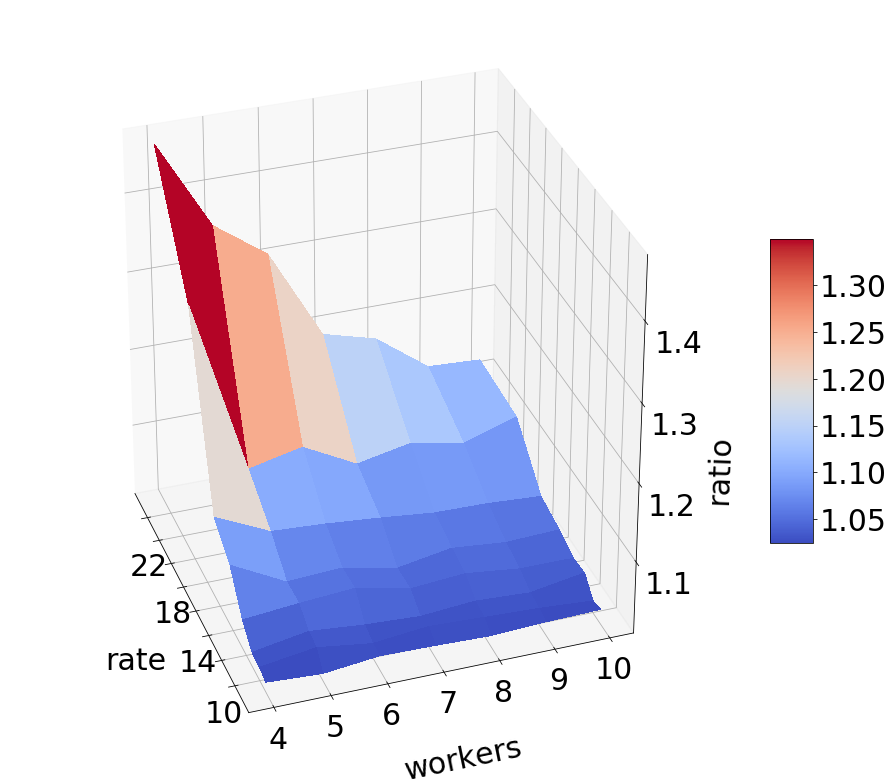

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('rate', fontsize = 30, labelpad=35)
ax.set_ylabel('workers', fontsize = 30, labelpad=35)
ax.set_zlabel('ratio', fontsize = 30, labelpad=35)

ax.invert_xaxis()
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(30)
ax.tick_params(axis='z', pad = 15)
ax.set_xticklabels([10, '', 14, '', 18, '', 22])
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(30)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(30)
surf = ax.plot_surface(1 / (X / 1000), Y, Z, cmap=cm.coolwarm, linewidth=10, antialiased=False)

b = fig.colorbar(surf, shrink=0.4, aspect=7)

b.ax.tick_params(labelsize=30) 

ax.view_init(30, -19)

plt.savefig("../Papers/2017/distributed_runtime_for_analytical_stream_processing/pics/overhead.pdf", format='pdf', bbox_inches='tight')